# 

# BGC Argo
Chloe Cheng

Opening Argo data downloaded from https://fleetmonitoring.euro-argo.eu/float/6902909. To download: click the NetCDF download button under 'Stations Data' and enter email. In my experience, the link took a few days to arrive.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [17]:
ds = xr.open_dataset('/Users/chloecheng/Downloads/GL_PR_PF_6902909.nc')
ds

<xarray.Dataset>
Dimensions:                   (TIME: 1501, LATITUDE: 1501, LONGITUDE: 1501,
                               POSITION: 1501, DEPTH: 1932)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2019-03-01T05:30:00 ... 2...
  * LATITUDE                  (LATITUDE) float32 -8.85 -8.85 ... -8.167 -8.167
  * LONGITUDE                 (LONGITUDE) float32 -140.6 -140.6 ... -142.2
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/46)
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    ...                        ...
    DOWN_IRRADIANCE412        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE412_QC     (TIME, DEPTH) float32 ...
    DOWN_IRRADIANCE490        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE490_QC     (TIME, DEPTH) float32 ...
    LGHT                      (TIME, DEPTH) float64 ...
    LGHT_QC                   (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  6902909
    institution:                    Laboratory of Oceanography of Villefranche
    institution_edmo_code:          490
    site_code:                       
    ...                             ...
    last_date_observation:          2024-04-09T01:46:00Z
    last_latitude_observation:      -8.16725
    last_longitude_observation:     -142.24309
    date_update:                    2024-04-19T06:49:52Z
    history:                        2024-04-19T06:49:52Z : Creation
    data_mode:                      M

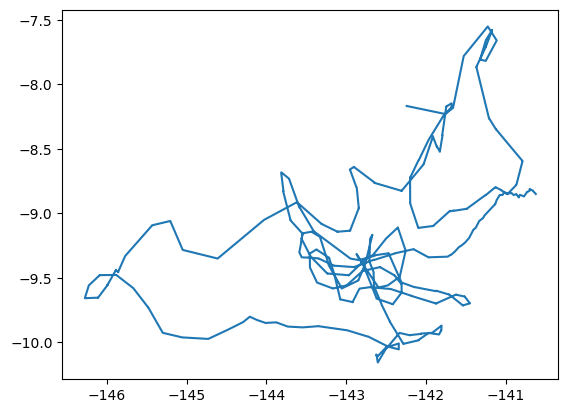

In [5]:
plt.plot(ds.LONGITUDE, ds.LATITUDE);

In [9]:
chla_ds = ds.CPHL_ADJUSTED.dropna(dim='TIME', how='all') # there are a lot of only-NaN times we need to drop
chla_ds

<xarray.DataArray 'CPHL_ADJUSTED' (TIME: 218, DEPTH: 1932)>
array([[0.266, 0.251, 0.244, ...,   nan,   nan,   nan],
       [0.266, 0.259, 0.266, ...,   nan,   nan,   nan],
       [0.284, 0.277, 0.284, ..., 0.018, 0.01 , 0.021],
       ...,
       [0.295, 0.295, 0.295, ...,   nan,   nan,   nan],
       [0.532, 0.532, 0.532, ...,   nan,   nan,   nan],
       [0.102, 0.102, 0.102, ...,   nan,   nan,   nan]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2019-03-01T05:30:00 ... 2024-04-09T01:46:00
Dimensions without coordinates: DEPTH
Attributes:
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    long_name:            Chlorophyll-a adjusted
    units:                mg m-3
    data_mode:            A
    ancillary_variables:  CPHL_ADJUSTED_QC

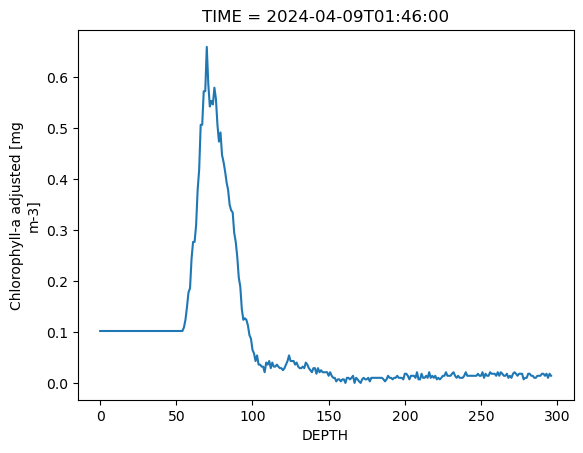

In [58]:
chla_ds[217].plot()

In [16]:
chla_ds, indices_dropped = ds.CPHL_ADJUSTED.dropna(dim='time', how='all', return_indices=True)
cleaned_ds = ds.drop_sel(time=ds.TIME.isel(time=indices_dropped))


TypeError: DataArray.dropna() got an unexpected keyword argument 'return_indices'

In [37]:
indices_dropped = ds.CPHL_ADJUSTED.isnull().all(dim='DEPTH').values

print(len(indices_dropped))

1501


In [45]:
times_dropped = np.unique(ds.CPHL_ADJUSTED.TIME.values[indices_dropped])

In [53]:
print(len(times_dropped))

426


In [51]:
cleaned_ds = ds.drop_duplicates(dim='TIME').drop_sel(TIME=times_dropped)
cleaned_ds = ds.drop_duplicates(dim='TIME')

In [52]:
cleaned_ds

<xarray.Dataset>
Dimensions:                   (TIME: 426, LATITUDE: 1501, LONGITUDE: 1501,
                               POSITION: 1501, DEPTH: 1932)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2019-03-01T05:30:00 ... 2...
  * LATITUDE                  (LATITUDE) float32 -8.85 -8.85 ... -8.167 -8.167
  * LONGITUDE                 (LONGITUDE) float32 -140.6 -140.6 ... -142.2
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/46)
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    ...                        ...
    DOWN_IRRADIANCE412        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE412_QC     (TIME, DEPTH) float32 ...
    DOWN_IRRADIANCE490        (TIME, DEPTH) float64 ...
    DOWN_IRRADIANCE490_QC     (TIME, DEPTH) float32 ...
    LGHT                      (TIME, DEPTH) float64 ...
    LGHT_QC                   (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  6902909
    institution:                    Laboratory of Oceanography of Villefranche
    institution_edmo_code:          490
    site_code:                       
    ...                             ...
    last_date_observation:          2024-04-09T01:46:00Z
    last_latitude_observation:      -8.16725
    last_longitude_observation:     -142.24309
    date_update:                    2024-04-19T06:49:52Z
    history:                        2024-04-19T06:49:52Z : Creation
    data_mode:                      M